# 0. File Structure setup

In [25]:
import sys, pathlib
sys.path.append(str(pathlib.Path.cwd().parent / 'src'))
import importlib, solar_eda as eda
importlib.reload(eda)

RAW = "../data/raw/benin.csv"
CLEAN = "../data/benin_clean.csv"

# 1. Load & profile

In [26]:
df_raw = eda.load_raw(RAW)
desc, nulls = eda.profile(df_raw)
display(desc); display(nulls.sort_values(ascending=False).head())

,count,mean,min,25%,50%,75%,max,std
Timestamp,525600,2022-02-07 12:00:30.000000512,2021-08-09 00:01:00,2021-11-08 06:00:45,2022-02-07 12:00:30,2022-05-09 18:00:15,2022-08-09 00:00:00,NaN
GHI,525600.0,240.559452,-12.9,-2.0,1.8,483.4,1413.0,331.131327
DNI,525600.0,167.187516,-7.8,-0.5,-0.1,314.2,952.3,261.710501
DHI,525600.0,115.358961,-12.6,-2.1,1.6,216.3,759.2,158.691074
ModA,525600.0,236.589496,0.0,0.0,4.5,463.7,1342.3,326.894859
ModB,525600.0,228.883576,0.0,0.0,4.3,447.9,1342.3,316.536515
Tamb,525600.0,28.179683,11.0,24.2,28.0,32.3,43.8,5.924297
RH,525600.0,54.487969,2.1,28.8,55.1,80.1,100.0,28.073069
WS,525600.0,2.121113,0.0,1.0,1.9,3.1,19.5,1.603466
WSgust,525600.0,2.809195,0.0,1.3,2.6,4.1,26.6,2.02912


Comments     100.0
GHI            0.0
Timestamp      0.0
DNI            0.0
DHI            0.0
dtype: float64

In [27]:
eda.dtype_summary(df_raw)
    

,dtype,non-null,missing,% missing,memory_mb
BP,int64,525600.0,0.0,0.0,4.01
Cleaning,int64,525600.0,0.0,0.0,4.01
Comments,float64,0.0,525600.0,1.0,4.01
DHI,float64,525600.0,0.0,0.0,4.01
DNI,float64,525600.0,0.0,0.0,4.01
GHI,float64,525600.0,0.0,0.0,4.01
ModA,float64,525600.0,0.0,0.0,4.01
ModB,float64,525600.0,0.0,0.0,4.01
RH,float64,525600.0,0.0,0.0,4.01
Precipitation,float64,525600.0,0.0,0.0,4.01


In [28]:
eda.numeric_overview(df_raw)


,count,mean,min,25%,50%,75%,max,std
Timestamp,525600.000,.3f,.3f,.3f,.3f,.3f,.3f,nan
GHI,525600.000,240.559,-12.900,-2.000,1.800,483.400,1413.000,331.131
DNI,525600.000,167.188,-7.800,-0.500,-0.100,314.200,952.300,261.711
DHI,525600.000,115.359,-12.600,-2.100,1.600,216.300,759.200,158.691
ModA,525600.000,236.589,0.000,0.000,4.500,463.700,1342.300,326.895
ModB,525600.000,228.884,0.000,0.000,4.300,447.900,1342.300,316.537
Tamb,525600.000,28.180,11.000,24.200,28.000,32.300,43.800,5.924
RH,525600.000,54.488,2.100,28.800,55.100,80.100,100.000,28.073
WS,525600.000,2.121,0.000,1.000,1.900,3.100,19.500,1.603
WSgust,525600.000,2.809,0.000,1.300,2.600,4.100,26.600,2.029


In [29]:
eda.cat_counts(df_raw, top=50)


{}

In [30]:
eda.missing_table(df_raw, mv_thresh=0.05)


,missing,% missing
Comments,525600,1.0


In [31]:
eda.dup_report(df_raw)


(np.int64(0),
 Empty DataFrame
 Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB, Comments]
 Index: [])

# 2. Data Cleaning

In [32]:
df_clean = eda.clean_solar_df(df_raw, save_path=CLEAN)

Dropping columns (≥100 % null): ['Comments']
Setting 261126 negative irradiance readings to 0 (night-time rows).
Dropped outliers: 7893
Saved cleaned dataframe → ../data/benin_clean.csv


# 3. Visualzation

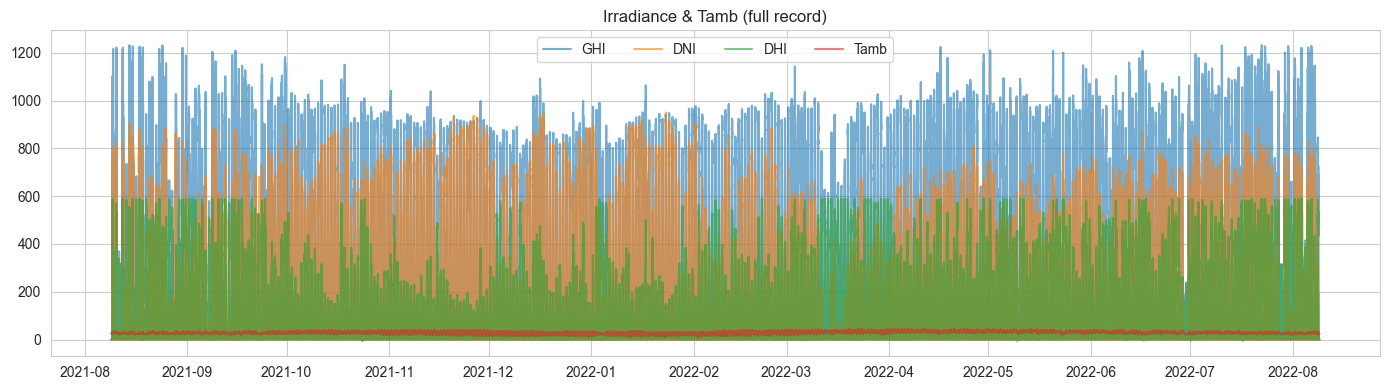

In [33]:
import matplotlib.pyplot as plt
eda.line_overview(df_clean); plt.show()


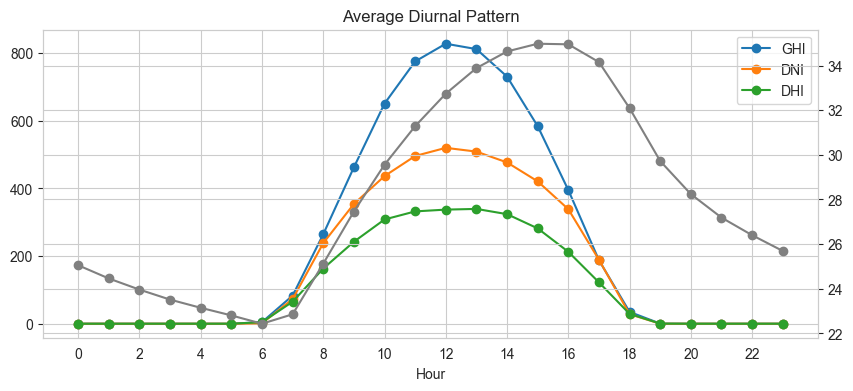

In [34]:
eda.diurnal_curve(df_clean); plt.show()


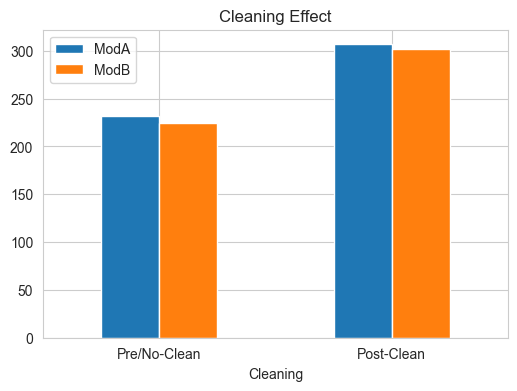

,ModA,ModB
Cleaning,,
Pre/No-Clean,232.2,224.8
Post-Clean,306.6,301.4


In [35]:
ax, impact = eda.cleaning_impact(df_clean); plt.show(); display(impact)


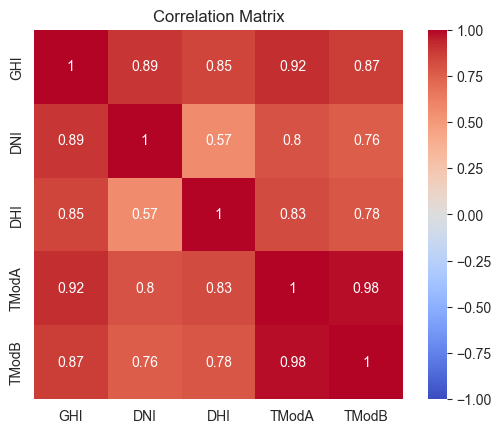

In [36]:
eda.corr_heatmap(df_clean); plt.show()


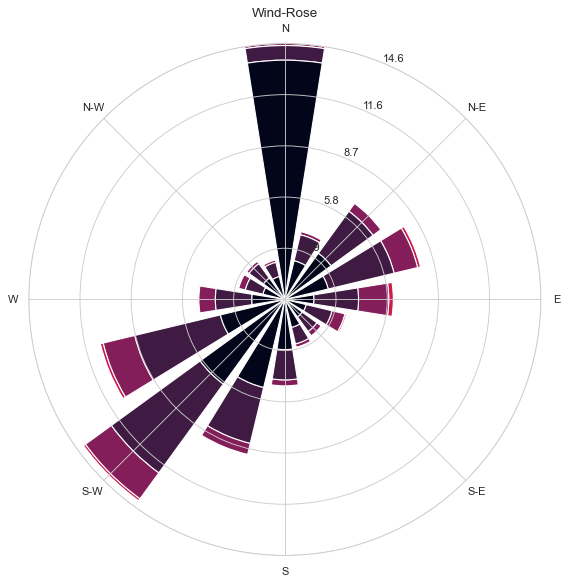

In [37]:
eda.wind_rose(df_clean); plt.show()


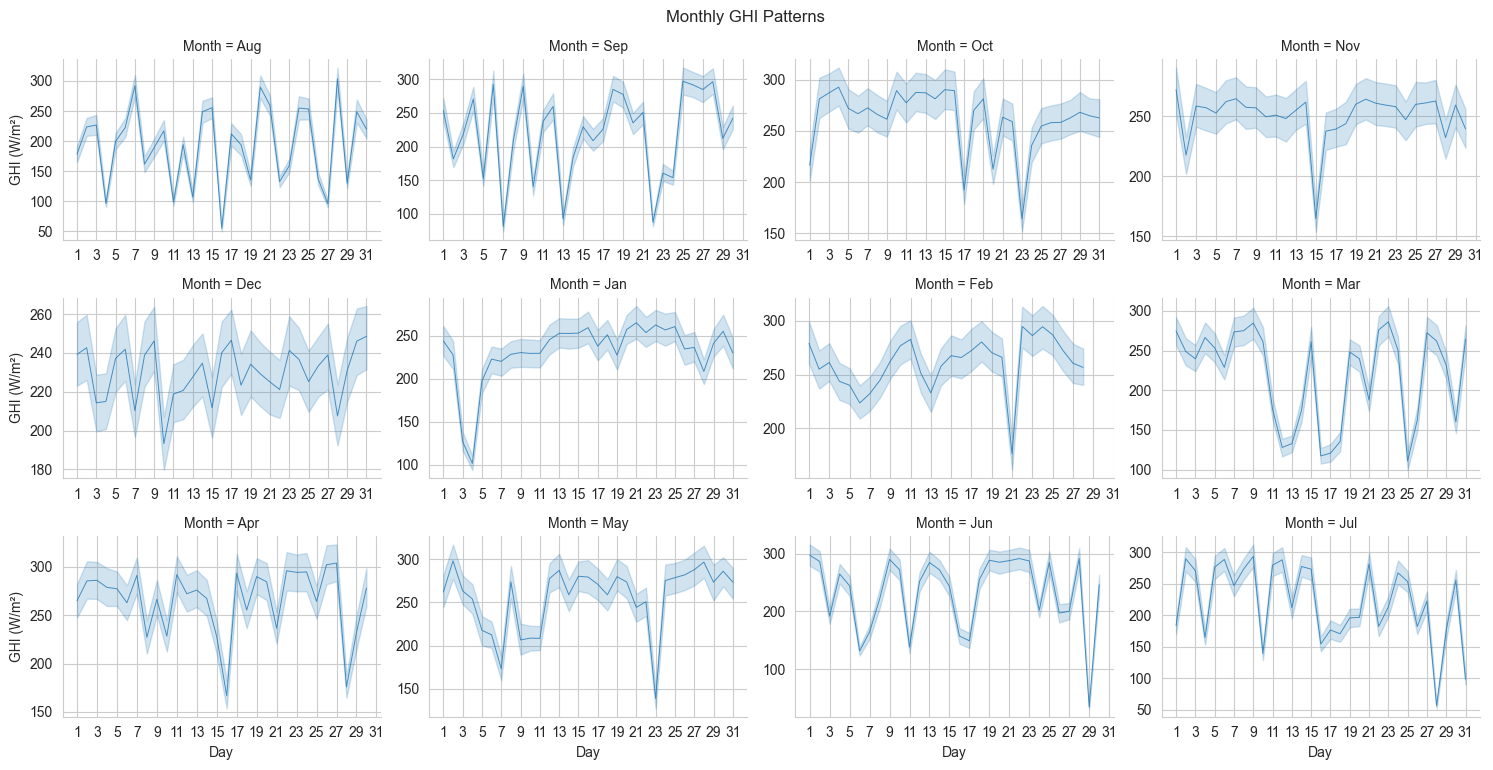

In [38]:
eda.monthly_facets(df_clean); plt.show()

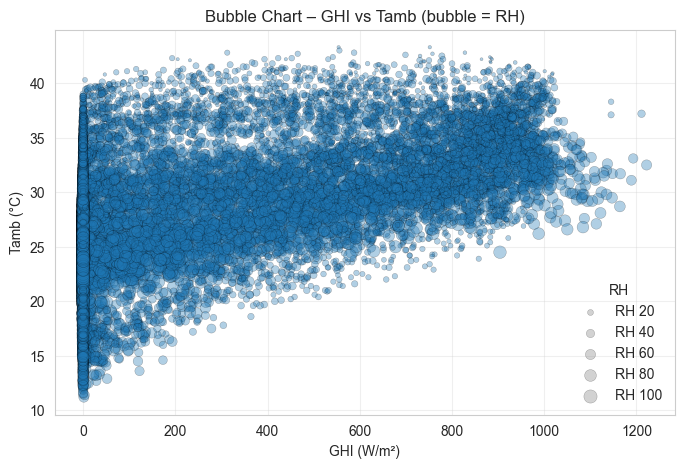

In [39]:
ax = eda.bubble_ghi_tamb(df_clean, size_col="RH")
plt.show() 

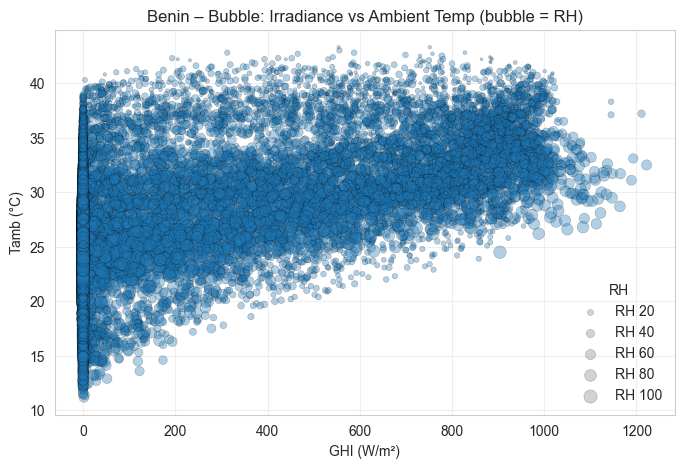

In [41]:
ax = eda.bubble_ghi_tamb(
    df_clean,        
    size_col="RH",      
    n=20_000,           
    size_scale=0.9,
    title="Benin – Bubble: Irradiance vs Ambient Temp (bubble = RH)"
)
plt.show()